## Question 1



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from numpy import square

In [2]:
df = pd.read_csv('clustering.csv', header = None)
df.rename(columns = {0:'x1',1:'x2'}, inplace = True)
df

,x1,x2
0,0.17978,-1.03430
1,-0.79447,-0.36758
2,-1.39200,-0.02695
3,-0.65219,-0.74951
4,-1.22590,1.76540
...,...,...
1995,4.67960,1.60930
1996,4.03430,0.97827
1997,7.43580,0.58226
1998,4.37940,0.76743


### Initial Scatter Plot of points

[Text(0.5, 0, 'x_1'), Text(0, 0.5, 'x_2')]

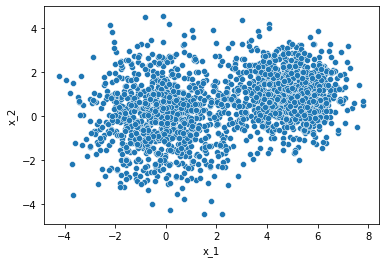

In [3]:
import seaborn as sns

scatter = sns.scatterplot(data = df, x = 'x1', y = 'x2')
scatter.set(xlabel = 'x_1', ylabel = 'x_2')

### K-means 

In [4]:
X = [] #list of 2 dimensional points in tuples
for i in range(len(df)):
    X.append((df['x1'][i],df['x2'][i]))

In [5]:
K = 5
init_means = random.sample(X,K) #randomly selects a set of K centres (means) initially

In [6]:
def Lloyd(X):
    a = 0
    dist = {} #dictionary that tracks minimum distance centres for each point
    centres = {} #finds nearest centres to a given point
    for i in X:
        two_norm_i = {}
        if i not in init_means:
            for j in init_means:
                
                two_norm_i[j] = square(np.linalg.norm(np.array(i)-np.array(j)))
                
            centres[i] = min(two_norm_i, key = two_norm_i.get)
            dist[i] = two_norm_i[centres[i]]
            
            C_set = list(set(val for val in centres.values()))

            cluster = [[] for i in range(K)]

            for i in range(len(C_set)):
                for j in centres.keys():
                    if centres[j] == C_set[i]:
                        cluster[i].append(j)   #assigning all points to their respective clusters. Each cluster is a list of points contained within it
                cluster[i].append(C_set[i]) 
                
    new_means = []
            
    for i in cluster:
        avg = [0,0]
        for j in i:
            avg[0] += j[0]
            avg[1] += j[1]
        avg[0] /= (len(i)+1)
        avg[1] /= (len(i)+1)
        new_means.append((avg[0],avg[1]))
    
    p = np.empty([2000,K]) #Matrix of binary indicator variables that check if point xi belongs to cluster Cj - if so, then pij = 1
    C = [] #Cluster Index Vector to populate with the cluster index of each point in X
    Obj = 0 #The best distortion, or averaged distance value, D obtained.
    D = 0
    for i in X:
        for j in cluster:
            if i in j:
                C.append(cluster.index(j) + 1)
                
    for i in range(len(X)):
        for j in np.unique(np.array(C)):
            if C[i] == j:
                p[i, (j-1)] = 1
            else:
                p[i, (j-1)] = 0
    for j in range(len(new_means)):
        for i in range(len(X)):
            Obj += square(np.linalg.norm(np.array(X[i]) - np.array(new_means[j])))*p[i,j]
    Obj /= len(X) 
    
    Y = np.matrix(new_means)   #K x d matrix consisting of centroids of d-dimension for each of the K clusters(partitions)      
    
    return Y,C,Obj

In [7]:
Lloyd(X)

(matrix([[-0.30578696, -0.41882656],
         [ 2.81457564,  1.55815999],
         [ 6.3690964 ,  0.83069717],
         [ 5.46494895,  2.19281316],
         [ 5.02671139,  0.33549403]]),
 [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  1,
  1,
  1,
  2,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  1,
  1,
  2,
  1,
  1,
  2,
  1,
  1,
  2,
  1,
  2,
  1,
  2,
  1,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  1,
  2,
  1,
  1,
  1,
  1,
  2,
  1,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  1,
  1,
  1,
  1,
  1,
  2,
  1,
  1,
  1,
  1,
  2,
  1,
  2,
  1,
  1,
  1,
  1,
  2,
  1,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  1,
  1,
  1,
  1,
  2,
  2,
  1,
  1,
  1,
  1,
  2,
  1,
  1,
  2,
  1,
  1,
  1,
  1,
  1,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  1,
  1,
  1,
  1,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1

In [8]:
tolerance = pow(10,-5)
init_tol = 100

Y,C,Obj = Lloyd(X)

diff = 0 #tracks magnitude of difference between final objective values between 2 iterations

Y_list = [Y] #tracks the new means in each iteration
C_list = [C] #tracks the new C vectors in each iteration
Obj_list = [Obj] #tracks the new objective values in each iteration

iteration = 0 #tracks which iteration we are at

while (init_tol > tolerance):
    iteration += 1 
    
    Y_list[-1] = Y_list[-1].tolist()
    for i in range(len(Y)):
        Y_list[-1][i] = tuple(Y_list[-1][i])
        
    init_means = Y_list[-1]
    
    Y1,C1,Obj1 = Lloyd(X)
    
    Y_list.append(Y1)
    C_list.append(C1)
    Obj_list.append(Obj1)
    
    init_tol = abs(Obj1 - Obj_list[-2])

print('Number of Iterations to Convergence: ', iteration)
print('Final Y matrix at Convergence: \n', Y_list[-1])
print('Final C vector at Convergence: \n ', C_list[-1])   
print('Final Objective Value at Convergence = ', Obj_list[-1])

Number of Iterations to Convergence:  35
Final Y matrix at Convergence: 
 [[ 5.43641197  0.58397877]
 [-0.69324394  1.29698055]
 [-0.98202516 -1.21835606]
 [ 1.54059332 -0.33401729]
 [ 4.22849574  1.79640633]]
Final C vector at Convergence: 
  [3, 3, 3, 3, 2, 2, 2, 3, 4, 4, 2, 4, 2, 4, 3, 2, 2, 4, 3, 4, 4, 3, 4, 2, 4, 2, 3, 2, 3, 2, 2, 4, 3, 2, 4, 2, 4, 4, 5, 3, 3, 5, 4, 2, 2, 3, 4, 2, 2, 4, 4, 4, 3, 3, 2, 3, 3, 2, 2, 2, 2, 3, 4, 2, 4, 2, 4, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 4, 2, 2, 3, 3, 4, 4, 4, 2, 4, 2, 3, 3, 2, 3, 2, 4, 2, 2, 3, 2, 3, 2, 2, 2, 4, 3, 4, 4, 3, 3, 2, 2, 3, 4, 4, 4, 2, 2, 2, 4, 5, 5, 2, 2, 2, 3, 5, 4, 4, 2, 4, 3, 4, 2, 3, 4, 3, 4, 4, 4, 3, 4, 2, 2, 4, 2, 3, 4, 2, 2, 3, 4, 4, 4, 2, 3, 3, 3, 3, 4, 3, 2, 3, 2, 2, 4, 3, 3, 2, 3, 3, 4, 4, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 2, 2, 3, 3, 2, 4, 4, 2, 2, 3, 3, 2, 5, 2, 3, 2, 4, 2, 4, 4, 2, 3, 2, 3, 2, 3, 4, 3, 3, 5, 4, 2, 3, 3, 3, 4, 4, 4, 3, 3, 3, 3, 4, 3, 2, 4, 2, 3, 4, 4, 2, 3, 3, 4, 2, 4, 5, 2, 4, 2, 4, 5, 3, 3, 3, 4, 3, 3, 2, 2,

In [9]:
df['C'] = [i for i in C_list[-1]]

## Colour-coded Scatterplot for k clusters

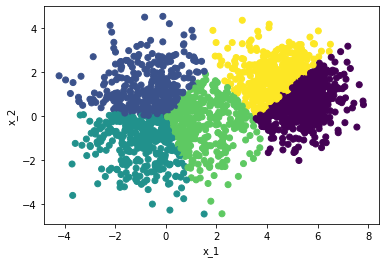

In [10]:
plt.scatter(df['x1'], df['x2'], c = df['C'], cmap = 'viridis')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

## When tolerance != 10^-5

In [11]:
tolerance = pow(10,-3)
init_tol = 100

Y,C,Obj = Lloyd(X)

diff = 0 #tracks magnitude of difference between final objective values between 2 iterations

Y_list = [Y] #tracks the new means in each iteration
C_list = [C] #tracks the new C vectors in each iteration
Obj_list = [Obj] #tracks the new objective values in each iteration

iteration = 0 #tracks which iteration we are at

while (init_tol > tolerance):
    iteration += 1 
    
    Y_list[-1] = Y_list[-1].tolist()
    for i in range(len(Y)):
        Y_list[-1][i] = tuple(Y_list[-1][i])
        
    init_means = Y_list[-1]
    
    Y1,C1,Obj1 = Lloyd(X)
    
    Y_list.append(Y1)
    C_list.append(C1)
    Obj_list.append(Obj1)
    
    init_tol = abs(Obj1 - Obj_list[-2])

print('Number of Iterations to Convergence: ', iteration)
print('Final Y matrix at Convergence: \n', Y_list[-1])
print('Final C vector at Convergence: \n ', C_list[-1])   
print('Final Objective Value at Convergence = ', Obj_list[-1])

Number of Iterations to Convergence:  1
Final Y matrix at Convergence: 
 [[ 5.43349104  0.58532467]
 [-0.69324394  1.29698055]
 [ 1.53792532 -0.33884527]
 [-0.98202521 -1.21835604]
 [ 4.22267214  1.79905837]]
Final C vector at Convergence: 
  [4, 4, 4, 4, 2, 2, 2, 4, 3, 3, 2, 3, 2, 3, 4, 2, 2, 3, 4, 3, 3, 4, 3, 2, 3, 2, 4, 2, 4, 2, 2, 3, 4, 2, 3, 2, 3, 3, 5, 4, 4, 5, 3, 2, 2, 4, 3, 2, 2, 3, 3, 3, 4, 4, 2, 4, 4, 2, 2, 2, 2, 4, 3, 2, 3, 2, 3, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 3, 2, 2, 4, 4, 3, 3, 3, 2, 3, 2, 4, 4, 2, 4, 2, 3, 2, 2, 4, 2, 4, 2, 2, 2, 3, 4, 3, 3, 4, 4, 2, 2, 4, 3, 3, 3, 2, 2, 2, 3, 5, 5, 2, 2, 2, 4, 5, 3, 3, 2, 3, 4, 3, 2, 4, 3, 4, 3, 3, 3, 4, 3, 2, 2, 3, 2, 4, 3, 2, 2, 4, 3, 3, 3, 2, 4, 4, 4, 4, 3, 4, 2, 4, 2, 2, 3, 4, 4, 2, 4, 4, 3, 3, 2, 2, 2, 4, 4, 4, 4, 4, 3, 3, 2, 2, 4, 4, 2, 3, 3, 2, 2, 4, 4, 2, 5, 2, 4, 2, 3, 2, 3, 3, 2, 4, 2, 4, 2, 4, 3, 4, 4, 5, 3, 2, 4, 4, 4, 3, 3, 3, 4, 4, 4, 4, 3, 4, 2, 3, 2, 4, 3, 3, 2, 4, 4, 3, 2, 3, 5, 2, 3, 2, 3, 5, 4, 4, 4, 3, 4, 4, 2, 2, 

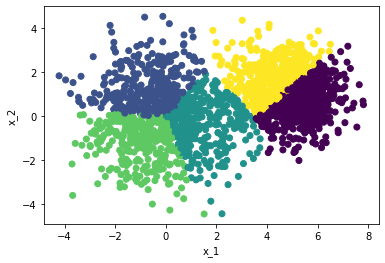

In [12]:
df['C'] = [i for i in C_list[-1]]
plt.scatter(df['x1'], df['x2'], c = df['C'], cmap = 'viridis')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()